In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import sys
sys.path.append('../src/')

In [3]:
import helpers as h

In [4]:
n_samples = 100
L = int(1e8)
w = int(1e3)
lim = L//(10*w)
print(lim)
pos = w*(np.arange(L//w)+0.5)
dist = w*np.arange(lim + 1)

10000


In [5]:
N = 1e3
mu_n = 1e-7
r = 1e-8
pi_0 = 2*N*mu_n
seg_0 = 2*mu_n * N * np.sum(1.0/np.arange(1,n_samples))
print(pi_0)
print(seg_0)

0.00019999999999999998
0.00103547550353


In [11]:
fn_pattern = '../simulations/slim/sweeps_fsel-{}_rep-{}.wsfs.txt.gz'

In [198]:
n_files = 100
fsel = 0.00001
lo_max = 49
#fsel = 0.0001

sfs = np.zeros(n_samples//2)
pi_corr = np.zeros(lim + 1)
lohi_corr = np.zeros((lo_max, lim + 1))
for i in range(n_files):
    wsfs = h.loadints(fn_pattern.format(fsel, i), (n_samples+1)//2, L//w)
    
    sfs += np.sum(wsfs, axis=1)
    
    pi_w = h.sfs2pi(wsfs, n_samples) / w
    pi_corr += h.cross_correlation(pi_w, pi_w, lim)
    
    for freq_cutoff in range(1, lo_max + 1):
        lo = np.sum(wsfs[:freq_cutoff,:], axis=0) / w
        hi = np.sum(wsfs[freq_cutoff:,:], axis=0) / w
        lohi_corr[freq_cutoff-1] += h.cross_correlation(lo, hi, lim)

    if (i+1) % 10 == 0:
        print(i+1, 'files processed.')
sfs /= n_files*L
pi_corr /= n_files
lohi_corr /= n_files

10 files processed.
20 files processed.
30 files processed.
40 files processed.
50 files processed.
60 files processed.
70 files processed.
80 files processed.
90 files processed.
100 files processed.


In [199]:
pi_mean = h.sfs2pi(sfs, n_samples)
lo_mean = np.cumsum(sfs)[:lo_max]
hi_mean = np.sum(sfs) - lo_mean

In [200]:
print(pi_mean, pi_mean / pi_0)
print(lo_mean, lo_mean / pi_0)
print(hi_mean+lo_mean, (hi_mean+lo_mean)/seg_0)

0.000169389735778 0.846948678889
[ 0.00018933  0.00028766  0.00035323  0.00040216  0.00044144  0.00047417
  0.00050218  0.00052682  0.00054903  0.00056865  0.00058652  0.00060289
  0.00061853  0.00063299  0.00064669  0.00065945  0.00067166  0.00068334
  0.00069414  0.00070466  0.00071491  0.00072491  0.00073431  0.00074325
  0.00075213  0.00076076  0.00076904  0.00077744  0.00078552  0.00079325
  0.00080097  0.0008085   0.00081583  0.00082296  0.00082996  0.00083682
  0.00084366  0.00085052  0.00085711  0.000864    0.00087073  0.0008774
  0.00088406  0.00089057  0.0008971   0.00090358  0.00091002  0.00091644
  0.00092281] [ 0.946667   1.43829    1.766136   2.0107845  2.207187   2.3708525
  2.510918   2.634076   2.745157   2.843262   2.932575   3.014461   3.092674
  3.1649495  3.233427   3.297247   3.358305   3.4166925  3.4707085
  3.5233005  3.574543   3.624561   3.6715635  3.716249   3.760627
  3.8037975  3.845203   3.887196   3.9275935  3.966241   4.0048595
  4.042509   4.079153   4.

In [201]:
print(lo_mean*w)
print(hi_mean*w)
print(lo_mean/(lo_mean+hi_mean))

[ 0.1893334  0.287658   0.3532272  0.4021569  0.4414374  0.4741705
  0.5021836  0.5268152  0.5490314  0.5686524  0.586515   0.6028922
  0.6185348  0.6329899  0.6466854  0.6594494  0.671661   0.6833385
  0.6941417  0.7046601  0.7149086  0.7249122  0.7343127  0.7432498
  0.7521254  0.7607595  0.7690406  0.7774392  0.7855187  0.7932482
  0.8009719  0.8085018  0.8158306  0.8229566  0.8299551  0.8368242
  0.8436626  0.8505233  0.8571068  0.863998   0.8707324  0.8773988
  0.884056   0.8905707  0.8970961  0.9035842  0.910023   0.9164425
  0.9228078]
[ 0.7366972  0.6383726  0.5728034  0.5238737  0.4845932  0.4518601
  0.423847   0.3992154  0.3769992  0.3573782  0.3395156  0.3231384
  0.3074958  0.2930407  0.2793452  0.2665812  0.2543696  0.2426921
  0.2318889  0.2213705  0.211122   0.2011184  0.1917179  0.1827808
  0.1739052  0.1652711  0.15699    0.1485914  0.1405119  0.1327824
  0.1250587  0.1175288  0.1102     0.103074   0.0960755  0.0892064
  0.082368   0.0755073  0.0689238  0.0620326  0.0

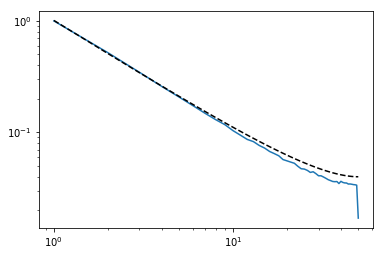

In [202]:
x = np.arange(1,n_samples//2 + 1)
plt.loglog(x, sfs/sfs[0])
plt.loglog(x, 1/x + 1/(n_samples - x), '--k')

In [203]:
dc = 2*mu_n/(pi_mean*r)
print(dc)

118070.908536


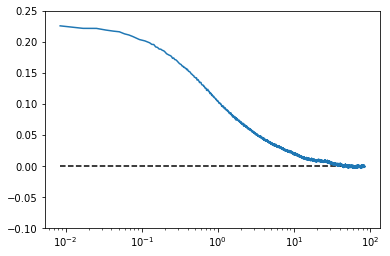

In [204]:
plt.semilogx(dist/dc, pi_corr/pi_mean**2)
plt.ylim([-0.1, 0.25])
plt.hlines(0, dist[1]/dc, dist[-1]/dc, linestyle='dashed')

1


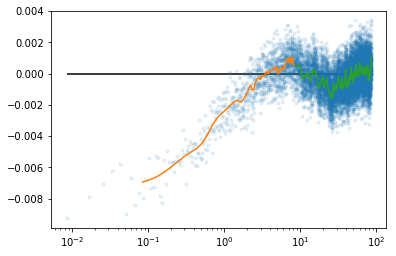

2


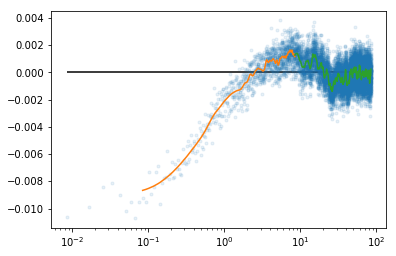

3


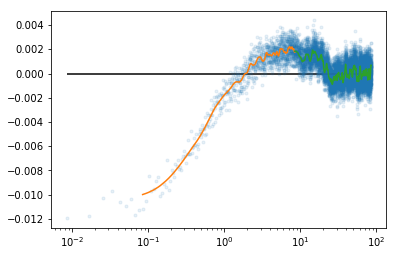

4


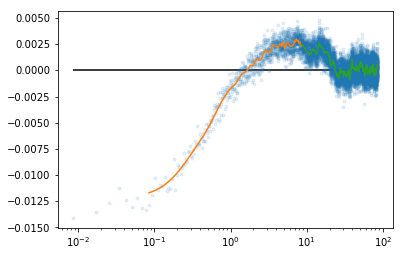

5


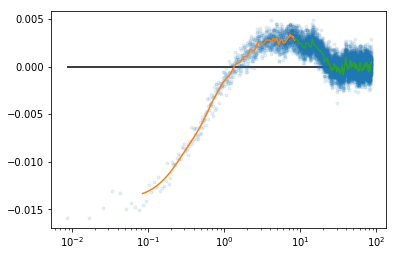

6


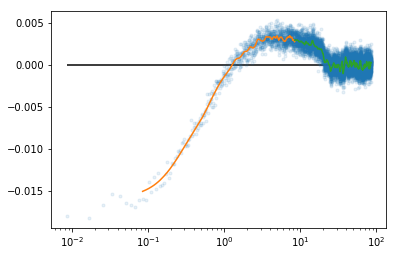

7


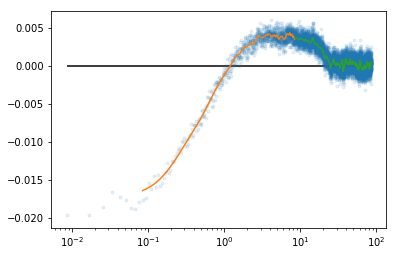

8


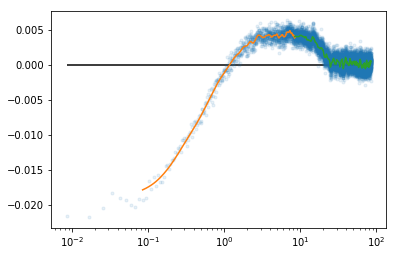

9


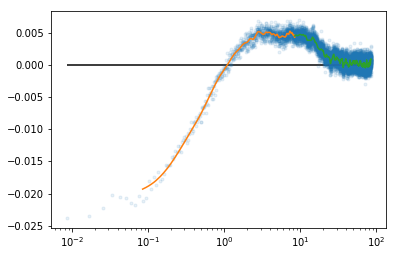

10


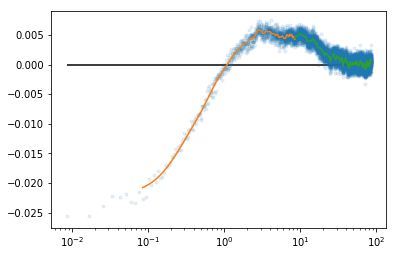

11


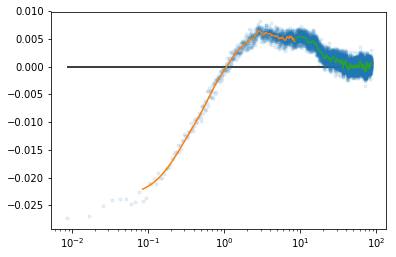

12


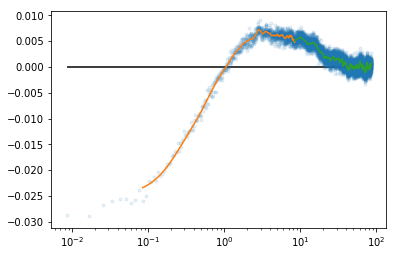

13


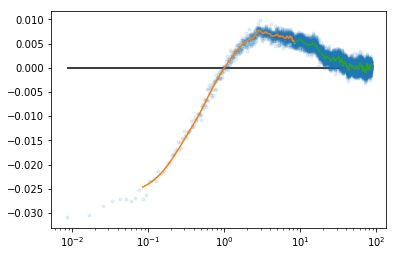

14


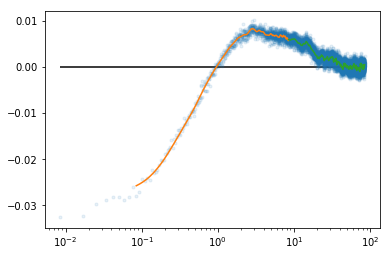

15


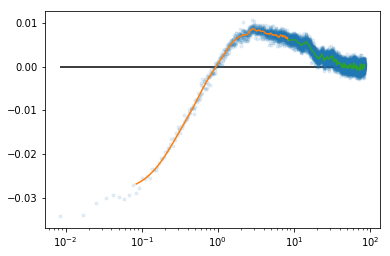

16


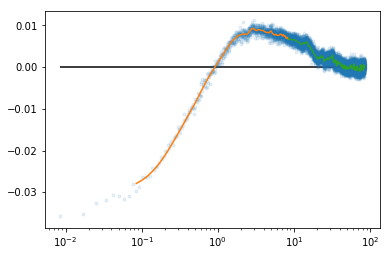

17


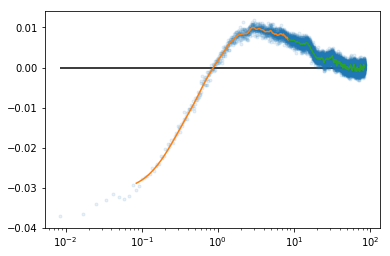

18


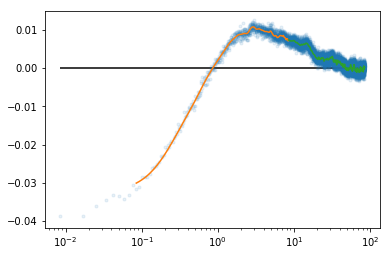

19


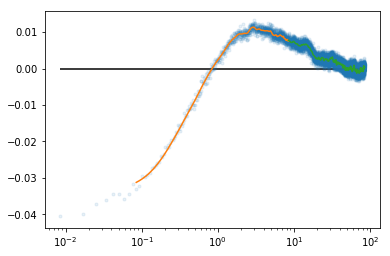

20


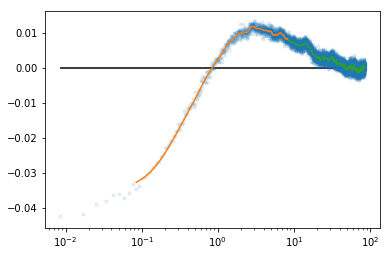

21


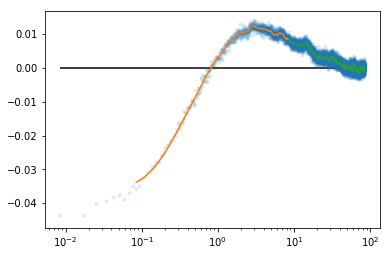

22


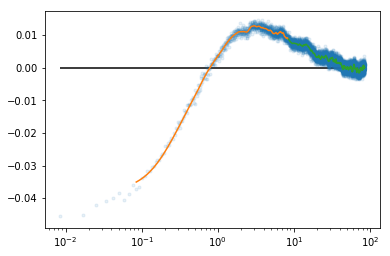

23


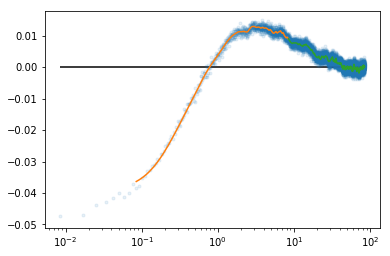

24


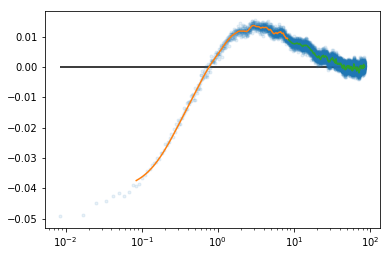

25


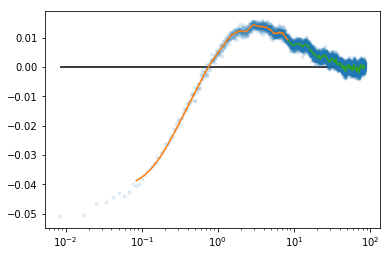

26


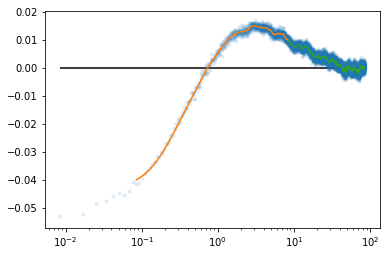

27


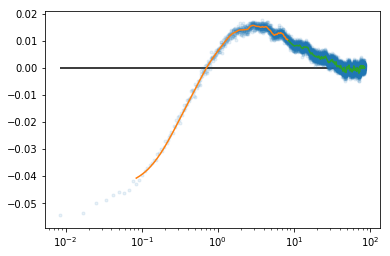

28


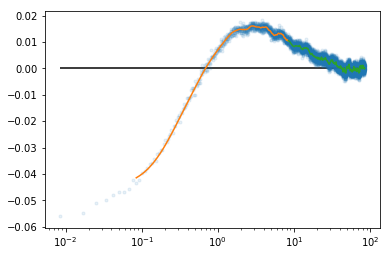

29


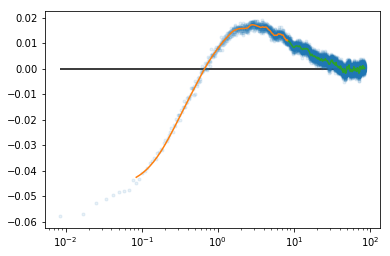

30


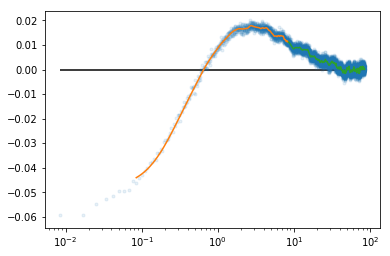

31


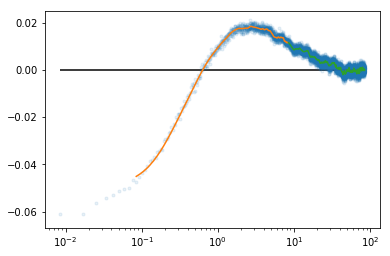

32


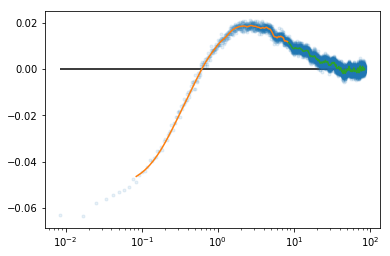

33


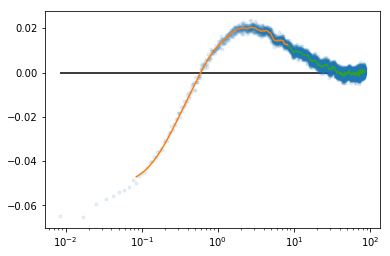

34


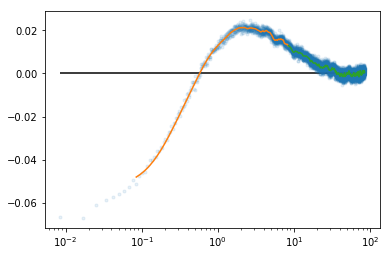

35


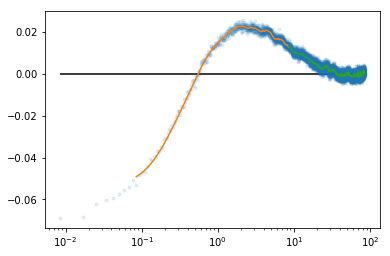

36


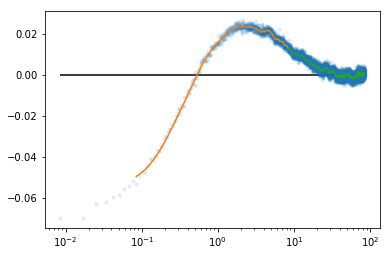

37


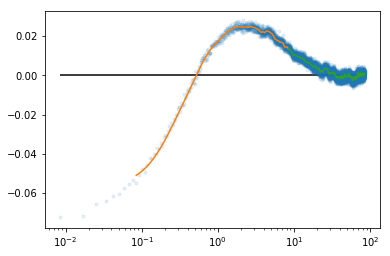

38


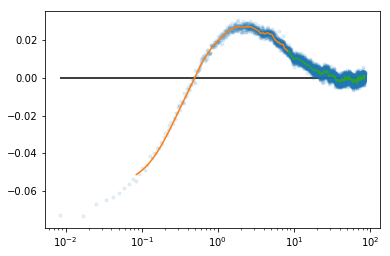

39


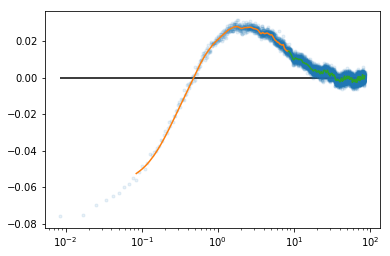

40


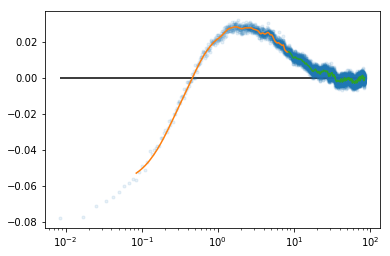

41


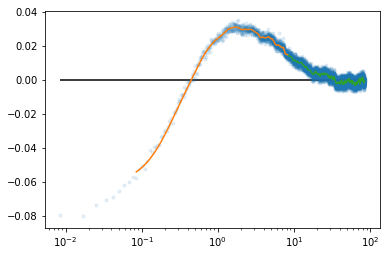

42


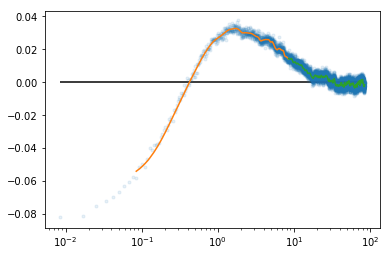

43


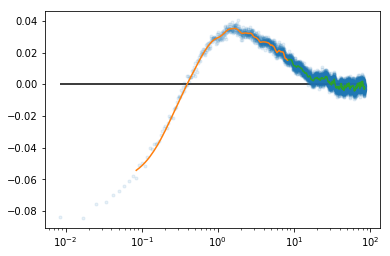

44


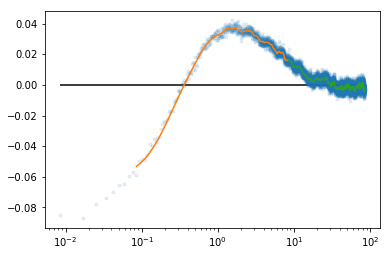

45


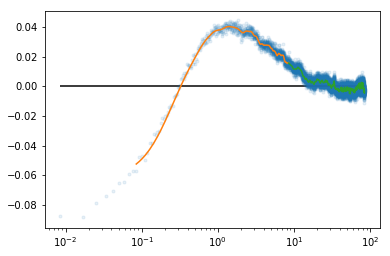

46


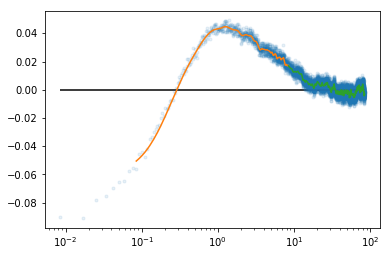

47


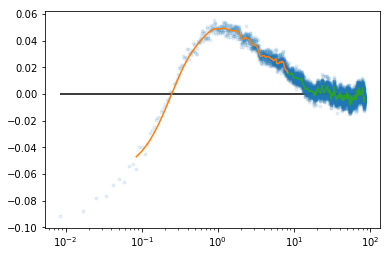

48


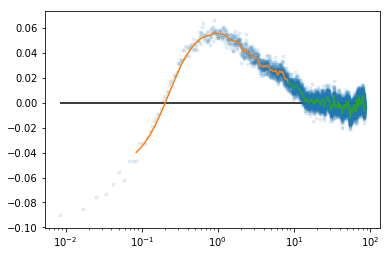

49


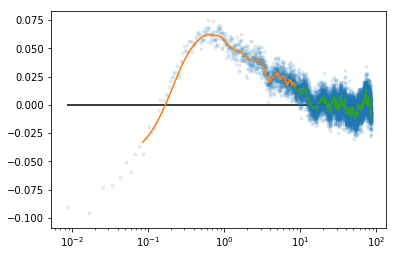

In [207]:
swp = 1000
x = dist / dc
for i in range(lo_max):
    plt.figure()
    print(i+1)
    
    y = lohi_corr[i,:] / (lo_mean[i]*hi_mean[i])
    sm1 = h.smooth(y, window_len=51)
    sm2 = h.smooth(y, window_len=101)
    
    plt.semilogx(x, y, '.', alpha=0.1)
    plt.semilogx(x[10:swp], sm1[10:swp])
    plt.semilogx(x[swp:], sm2[swp:])
    plt.hlines(0, x[1], x[-1])
    
    #plt.ylim([-0.05, 0.01])
    plt.show()

# Test the behavior of correlate for sparse data

-1.17605547593e-05


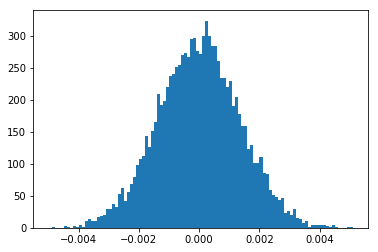

In [10]:
l = int(1e5)
X = np.random.poisson(0.2, l)
Y = np.random.poisson(0.8, l)
Z = h.cross_correlation(X, Y, l//10)
#print(X)
#print(Y)
#print(Z)
plt.hist(Z, bins=np.arange(-0.005, 0.0051, 0.0001))
print(np.mean(Z))

In [ ]:
X = np.arange(10)
w = np.ones(4)
Y = np.convolve(X,w,'valid')
print(X)
print(Y)
print(len(Y))